# Testing GraphSearch Distance Concepts

## Load Libraries

In [14]:
import srex
import operator
import nltk

#Download stopword
if(0):
    nltk.download('stopwords') 
    nltk.download('punkt') # Tokenizers
    nltk.download('wordnet') # Wordnet

## Initialize some variables

In [15]:
# Stemmer
st = srex.PorterStemmer()

In [16]:
# Stop Words
stop_words_list = srex.stopwords.words('english') #a small one

In [17]:
newStopWords = srex.get_stop_words('en') # a big one

In [18]:
stop_words_list.extend(newStopWords) # all together

In [19]:
query                  = 'internet of things iot'
reference_term         = 'iot'
nr_search_results      = 10

ranking_weight_type    = 'none' # it can be: 'none', 'linear' or 'inverse'
limit_distance         = 4 
sumarize               = 'none' 
include_reference_term = False
nr_of_graph_terms      = 15


In [22]:
# Articulo de revista científica IEEE Explore
#doc = srex.get_ieee_explore_article('article_number', '8316016')

# Ranking de documentos de IEEE Explore CON ponderación de documentos
results = srex.get_ieee_explore_ranking(query, nr_search_results)

# Ranking de documentos de IEEE Explore SIN ponderación de documentos
#results = srex.get_ieee_explore_ranking("search engine", 10)

In [23]:
doc_weighted = srex.get_ranking_as_string(results, ranking_weight_type)

In [24]:
parragraphs_list = doc_weighted.split('.')

## Text transformations

Remove stopwords, punctuation, stemming, lematization

In [25]:
processed_parragraphs_list = list(map(lambda x: srex.text_transformations(x, stop_words_list, lema=True, stem=False), parragraphs_list))

## Calculate word positions

In [26]:
doc_pos_matrix = srex.get_documents_positions_matrix(processed_parragraphs_list)

## Calculate vecinity matrix

In [27]:
vecinity_matrix = srex.get_vecinity_matrix(doc_pos_matrix, reference_term, limit_distance, sumarize, include_reference_term)

In [28]:
unique_vecinity_dict = srex.get_unique_vecinity_dict(vecinity_matrix)

In [29]:
terms_freq_dict = {k: len(v) for k, v in unique_vecinity_dict.items()}

In [30]:
foo = srex.normalize_dictionary_values(terms_freq_dict, [1,20])

In [31]:
sorted_terms_freq_dict = sorted(terms_freq_dict.items(), key=operator.itemgetter(1), reverse=True)

In [32]:
first_sorted_terms_freq_dict = {k: v for k, v in list(sorted_terms_freq_dict)[:nr_of_graph_terms]}

In [33]:
most_freq_distance_dict = {k: {'frequency':terms_freq_dict[k], 'distance':srex.np.median(unique_vecinity_dict[k])} for k in first_sorted_terms_freq_dict.keys()}

In [34]:
most_freq_distance_dict

{'device': {'frequency': 20.0, 'distance': 1.0},
 'internet': {'frequency': 14.571428571428573, 'distance': 1.0},
 'threat': {'frequency': 11.857142857142858, 'distance': 1.0},
 'data': {'frequency': 9.142857142857142, 'distance': 1.5},
 'network': {'frequency': 9.142857142857142, 'distance': 1.0},
 'security': {'frequency': 6.428571428571429, 'distance': 1.0},
 'jammer': {'frequency': 6.428571428571429, 'distance': 2.0},
 'reactive': {'frequency': 6.428571428571429, 'distance': 3.0},
 'cyber': {'frequency': 6.428571428571429, 'distance': 2.0},
 'interaction': {'frequency': 3.7142857142857144, 'distance': 2.0},
 'expert': {'frequency': 3.7142857142857144, 'distance': 3.0},
 'perceive': {'frequency': 3.7142857142857144, 'distance': 3.0},
 'consumer': {'frequency': 3.7142857142857144, 'distance': 1.0},
 'smart': {'frequency': 3.7142857142857144, 'distance': 1.0},
 'application': {'frequency': 3.7142857142857144, 'distance': 1.0}}

In [20]:
graph = srex.getGraphViz(reference_term, most_freq_distance_dict, '0.7', 'deepskyblue')

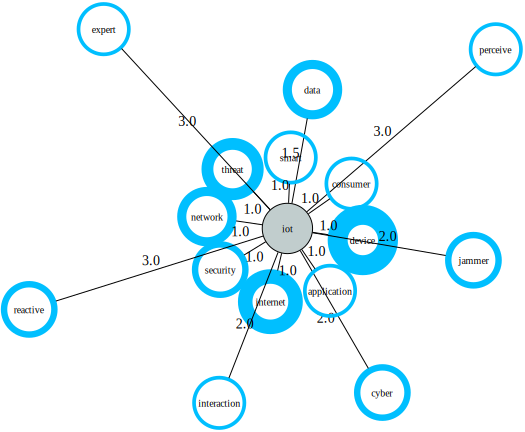

In [21]:
graph